In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

In [3]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [4]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import tensorboard
import os
# from keras import backend as K

In [33]:
img_path = list()
Races = list()

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')
  if len(temp[0].split('_')) == 4:
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    Races.append(int(Race))
  else:
    continue

classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}
Races_temp = [classes_labels[i] for i in Races]
Races = [str(to_categorical(i, len(classes_labels))) for i in Races]


df = pd.DataFrame ( {'image':img_path, 'Race': Races }) 

one_hot = pd.get_dummies(Races_temp)
one_hot

,Asian,Black,Indian,Others,White
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
23700,0,0,0,0,1
23701,0,0,0,0,1
23702,0,0,0,0,1
23703,1,0,0,0,0


تعداد داده ها = ۲۳۷۰۵
تعداد کلاسها = ۵

تعداد داده ها = ۲۳۷۰۵
تعداد کلاسها = ۵

In [34]:
df

,image,Race
0,/content/UTKFace/85_1_0_20170110183802977.jpg....,[1. 0. 0. 0. 0.]
1,/content/UTKFace/26_0_1_20170113151548832.jpg....,[0. 1. 0. 0. 0.]
2,/content/UTKFace/26_0_0_20170104170627658.jpg....,[1. 0. 0. 0. 0.]
3,/content/UTKFace/65_1_0_20170110131349129.jpg....,[1. 0. 0. 0. 0.]
4,/content/UTKFace/26_1_1_20170116233613793.jpg....,[0. 1. 0. 0. 0.]
...,...,...
23700,/content/UTKFace/24_0_0_20170104004125063.jpg....,[1. 0. 0. 0. 0.]
23701,/content/UTKFace/30_1_0_20170117203639423.jpg....,[1. 0. 0. 0. 0.]
23702,/content/UTKFace/45_0_0_20170117204641954.jpg....,[1. 0. 0. 0. 0.]
23703,/content/UTKFace/1_0_2_20161219155850477.jpg.c...,[0. 0. 1. 0. 0.]


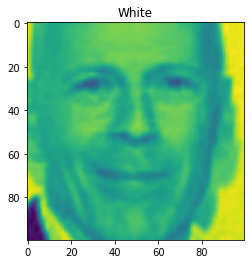

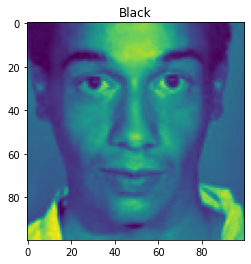

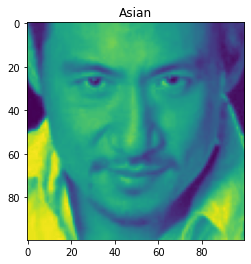

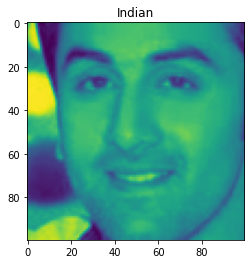

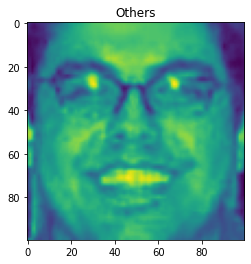

In [8]:
# img = [None]*5
img1 = preprocessing.image.load_img('/content/UTKFace/55_0_0_20170120222234390.jpg.chip.jpg', color_mode = "grayscale", target_size=(100, 100))
img2 = preprocessing.image.load_img('/content/UTKFace/34_0_1_20170117021528378.jpg.chip.jpg', color_mode = "grayscale",target_size=(100, 100))
img3 = preprocessing.image.load_img('/content/UTKFace/30_0_2_20170104021209963.jpg.chip.jpg', color_mode = "grayscale",target_size=(100, 100))
img4 = preprocessing.image.load_img('/content/UTKFace/24_0_3_20170117150025331.jpg.chip.jpg', color_mode = "grayscale",target_size=(100, 100))
img5 = preprocessing.image.load_img('/content/UTKFace/38_0_4_20170109013315959.jpg.chip.jpg', color_mode = "grayscale",target_size=(100, 100))

img = [img1, img2, img3, img4, img5]

for i in range(5):
  plt.imshow(img[i])
  plt.title(classes_labels[i])
  plt.show()

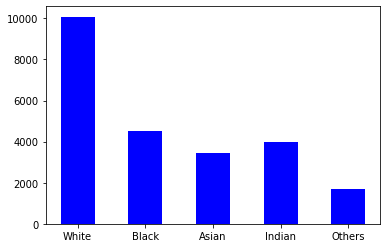

In [36]:
class_count = [0]*5
classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}


for j in range(5):
  class_count[j] = sum(one_hot[classes_labels[j]])

fig, ax = plt.subplots()
ax.bar(classes_labels.values(), class_count, color ='b',  width = 0.5)
plt.show()

In [24]:
dataGenerator = preprocessing.image.ImageDataGenerator( rescale = 1/255.0, validation_split = 0.3)

# New Section




In [37]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Race',
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "training",
    shuffle = True
)


Found 16594 validated image filenames belonging to 5 classes.


In [38]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Race',
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "validation",
    shuffle = True
)

Found 7111 validated image filenames belonging to 5 classes.


In [40]:
from keras import backend

def recall_m(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = backend.sum(backend.round(backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = backend.sum(backend.round(backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+backend.epsilon()))


In [82]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

In [83]:
model = models.Model(inputs=input, outputs=output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = "categorical_crossentropy", metrics=['accuracy', f1_m, precision_m, recall_m])
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              10241024  
_________________________________________________________________
dense_41 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 645       
Total params: 10,832,133
Trainable params: 10,832,133
Non-trainable params: 0
______________________________________________

In [84]:
history = model.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 22s 41ms/step - loss: 1.2870 - accuracy: 0.4907 - f1_m: 0.3462 - precision_m: 0.6248 - recall_m: 0.2591 - val_loss: 1.4433 - val_accuracy: 0.3347 - val_f1_m: 0.2673 - val_precision_m: 0.3791 - val_recall_m: 0.2090
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 1.1268 - accuracy: 0.5764 - f1_m: 0.4940 - precision_m: 0.6957 - recall_m: 0.3938 - val_loss: 1.0480 - val_accuracy: 0.6084 - val_f1_m: 0.5558 - val_precision_m: 0.7115 - val_recall_m: 0.4589
Epoch 3/10
519/519 [==============================] - 21s 41ms/step - loss: 1.0428 - accuracy: 0.6167 - f1_m: 0.5614 - precision_m: 0.7210 - recall_m: 0.4663 - val_loss: 0.9801 - val_accuracy: 0.6483 - val_f1_m: 0.5868 - val_precision_m: 0.7632 - val_recall_m: 0.4801
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9840 - accuracy: 0.6373 - f1_m: 0.5964 - precision_m: 0.7358 - recall_m: 0.5066 - val_loss: 0.9998 - val_accuracy: 0.6

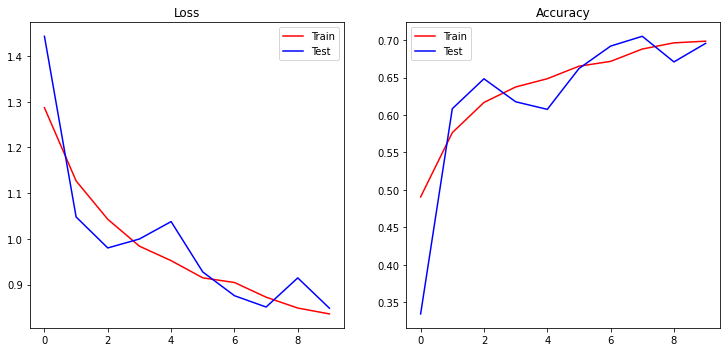

Loss :  0.8482860922813416
Accuracy :  69.55420970916748 %
F1 :  68.2797372341156 %
Precision :  76.4558732509613 %
Recall :  61.87540292739868 %


In [85]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(15,15,1)
plt.plot(history.history['loss'], color ='r', label = "Train")
plt.plot(history.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(15,15,2)
plt.plot(history.history['accuracy'], color ='r', label = "Train")
plt.plot(history.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

# Momentum:
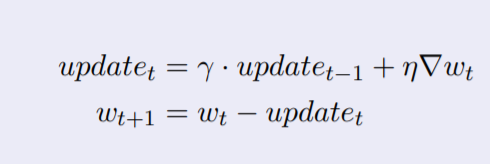

در حالت عادی، هنگامی که میخواهیم وزن ها را آپدیت کنیم،مشتق تابع خطا را در نرخ یادگیری ضرب میکنیم.

اما با مومنتوم،این تغییرات را به تغییرات مرحله قبل هم وابسته میکنیم و این تغییران را در مومنتوم ضرب کرده و به وزن جدید اضافه میکنیم.

استفاده از این روش به این دلیل خوب است که سرعت یادگیری را بالا میبرد. همچنین باعث میشود که در نقاط کمینه محلی نیافتیم.

## 2:
زمانی که با مامنتوم 0.5 آموزش میدهیم , همانطور که در نتایج مشخص است در ایپاک های زودتری به جواب بهنیه خود میرسیم
ولی اگر آن را بیش ازحد زیادتر کنیم , به دلیل افزایش زیاد گام های تغییرات , وزن های ما با مقادیر زیادی جابجا میشوند و دیگر نمیتوان شبکه را خوب آموزش داد.

در اینجا با افزایش مومنتوم، نتایج کمی بدتر شده است.

## 3:
خیر مفید نیست - زیرا همانطور که در قسمت دوم هم گفته شده و در نمودار مثال بالا هم میبینیم , استفاده از ماومنتم زیاد باعث میشود نرخ تغیییرات زیاد شود و به مقادیر درستی نرسیم. زیرا ممکن است به جواب نزدیک باشیم بعد با تغییرات زیاد از آن دور شویم و دوباره بخواهیم بهش نزدیک شویم و دوباره با تغییرات زیاد دور شویم.

# 4:
همانطور که در نمودار پایین دیده میشود , شیب نمودار هامون بیشتره یعنی سرعت حرک به سوی هدف بیشتره و همچنین میانگین خطای کمتری داریم ولی همانطور که مشخص است نویز زیادی در نمودار داریم و این به همان دلیل است که روش آدام خودش نوعی مومنتم دارد

In [89]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

model2 = models.Model(inputs=input, outputs=output)
model2.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.50), loss='categorical_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])
history2 = model2.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 22s 42ms/step - loss: 1.2580 - accuracy: 0.5116 - f1_m: 0.3820 - precision_m: 0.6494 - recall_m: 0.2922 - val_loss: 1.0937 - val_accuracy: 0.5912 - val_f1_m: 0.5497 - val_precision_m: 0.6963 - val_recall_m: 0.4569
Epoch 2/10
519/519 [==============================] - 21s 41ms/step - loss: 1.0671 - accuracy: 0.6056 - f1_m: 0.5478 - precision_m: 0.7151 - recall_m: 0.4521 - val_loss: 1.0676 - val_accuracy: 0.6157 - val_f1_m: 0.5871 - val_precision_m: 0.6847 - val_recall_m: 0.5163
Epoch 3/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9884 - accuracy: 0.6402 - f1_m: 0.6001 - precision_m: 0.7353 - recall_m: 0.5121 - val_loss: 0.9839 - val_accuracy: 0.6393 - val_f1_m: 0.6092 - val_precision_m: 0.7227 - val_recall_m: 0.5288
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9339 - accuracy: 0.6594 - f1_m: 0.6307 - precision_m: 0.7523 - recall_m: 0.5472 - val_loss: 1.0088 - val_accuracy: 0.6

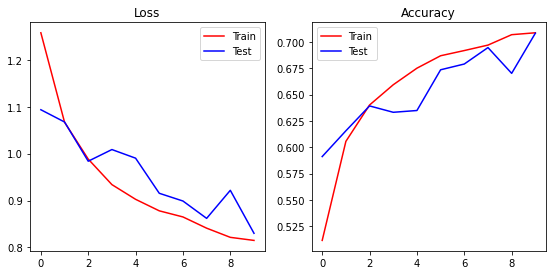

Loss :  0.8300195932388306
Accuracy :  70.83392143249512 %
F1 :  69.0703272819519 %
Precision :  78.56248021125793 %
Recall :  61.85137629508972 %


In [90]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history2.history['loss'], color ='r', label = "Train")
plt.plot(history2.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history2.history['accuracy'], color ='r', label = "Train")
plt.plot(history2.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model2.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

In [91]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

model3 = models.Model(inputs=input, outputs=output)
model3.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.90), loss='categorical_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])
history3 = model3.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 22s 41ms/step - loss: 1.3207 - accuracy: 0.4866 - f1_m: 0.3300 - precision_m: 0.5971 - recall_m: 0.2493 - val_loss: 1.1608 - val_accuracy: 0.5681 - val_f1_m: 0.4516 - val_precision_m: 0.7582 - val_recall_m: 0.3265
Epoch 2/10
519/519 [==============================] - 21s 41ms/step - loss: 1.1395 - accuracy: 0.5684 - f1_m: 0.4954 - precision_m: 0.7106 - recall_m: 0.3951 - val_loss: 1.1015 - val_accuracy: 0.5867 - val_f1_m: 0.5034 - val_precision_m: 0.7867 - val_recall_m: 0.3736
Epoch 3/10
519/519 [==============================] - 21s 41ms/step - loss: 1.0590 - accuracy: 0.6115 - f1_m: 0.5610 - precision_m: 0.7332 - recall_m: 0.4632 - val_loss: 0.9803 - val_accuracy: 0.6392 - val_f1_m: 0.6136 - val_precision_m: 0.7240 - val_recall_m: 0.5349
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9718 - accuracy: 0.6509 - f1_m: 0.6157 - precision_m: 0.7485 - recall_m: 0.5285 - val_loss: 1.0042 - val_accuracy: 0.6

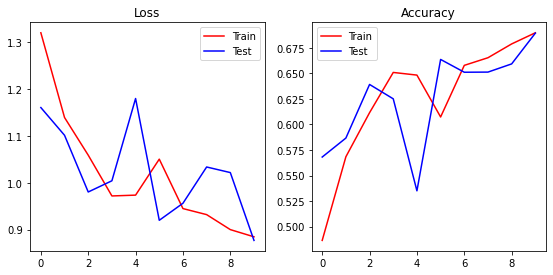

Loss :  0.8766830563545227
Accuracy :  68.93545389175415 %
F1 :  66.21564030647278 %
Precision :  78.44489216804504 %
Recall :  57.58328437805176 %


In [92]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history3.history['loss'], color ='r', label = "Train")
plt.plot(history3.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history3.history['accuracy'], color ='r', label = "Train")
plt.plot(history3.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model3.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

In [86]:
model4 = models.Model(inputs=input, outputs=output)
model4.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
history4 = model4.fit(TrainData,validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 23s 42ms/step - loss: 1.4162 - accuracy: 0.5278 - f1_m: 0.4396 - precision_m: 0.6467 - recall_m: 0.3531 - val_loss: 1.0384 - val_accuracy: 0.6074 - val_f1_m: 0.5686 - val_precision_m: 0.7030 - val_recall_m: 0.4802
Epoch 2/10
519/519 [==============================] - 22s 42ms/step - loss: 1.0604 - accuracy: 0.6114 - f1_m: 0.5615 - precision_m: 0.7181 - recall_m: 0.4694 - val_loss: 0.9577 - val_accuracy: 0.6572 - val_f1_m: 0.6325 - val_precision_m: 0.7436 - val_recall_m: 0.5527
Epoch 3/10
519/519 [==============================] - 22s 42ms/step - loss: 0.9717 - accuracy: 0.6446 - f1_m: 0.6123 - precision_m: 0.7405 - recall_m: 0.5266 - val_loss: 0.9404 - val_accuracy: 0.6632 - val_f1_m: 0.6077 - val_precision_m: 0.7813 - val_recall_m: 0.5008
Epoch 4/10
519/519 [==============================] - 22s 42ms/step - loss: 0.9353 - accuracy: 0.6647 - f1_m: 0.6339 - precision_m: 0.7515 - recall_m: 0.5529 - val_loss: 0.9369 - val_accuracy: 0.6

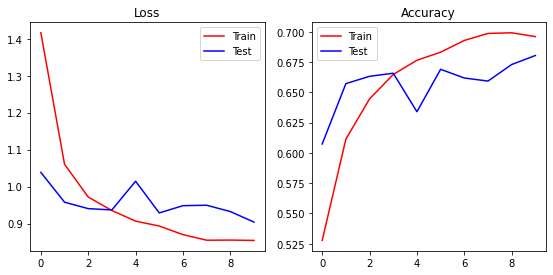

Loss :  0.9038649797439575
Accuracy :  68.0354356765747 %
F1 :  67.01640486717224 %
Precision :  74.58193898200989 %
Recall :  61.0265851020813 %


In [87]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history4.history['loss'], color ='r', label = "Train")
plt.plot(history4.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history4.history['accuracy'], color ='r', label = "Train")
plt.plot(history4.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model4.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

# EPOCH:
### 1:
چون ما از داده ی محدودی استفاده میکنیم , برای اینکه شبکه ما خوب آموزش داده شود و وزن ها چندین بار آپدیت شوند نیاز داریم که داده ای که داریم رو چندین بار به شبکه بدهیم تا دچار کمبود داده نشویم
حالا اگر داده های ما به اندازه کافی زیاد بودند نیاز نیست دیگر چندین بار آنها را به شبکه بدهیم
### 2:
میشود overfitting خیر - زیاد کردن بیش از حد تعداد ایپاک ها منجر به
یعنی شبکه بیش از حد خودش را با داده آموزش وفق میدهد و مقدار خطای آن برای داده تست بالا میرود

#### روشها عبارتند از:
**ساده سازی مدل
(Simplifying model):**

یعنی شبکه خود را ساده تر کنیم تا مدل ما زیاد پیچیده نشود و نتواند که دقیقا شبیه داده آموزش شود . مثلا با کاهش تعداد لایه ها و نورون ها

**Early Stopping :**

یعنی آموزش خود را تا جایی ادامه دهیم که نمودار های خطای داده آموزش و تست هر دو نزولی باشند و زمانی که خطای داده تست شروع کرد به افزایش یافتن آنگاه آموزش را متوقف کنیم.

 **L۲ یا L۱ Regularization استفاده از :**

 به این صورت است که به تابع خطا یک مقدار پنالتی اضافه میکنیم که برابر است با مجموع قدرمطلق یا مجذور وزن ها , تا به این ترتیب وزن ها کوچک باقی بمانند و تاثیر گذاری های مختلف آنها کاهش یابد تا در نتیجه مدل ساده تر شود.

**هاDropout استفاده از:**

در زمان آموزش برخی از نورون ها را حذف میکنیم . این به این دلیل است که میدانیم شبکه های مختلف به طرق مختلفی اورفیت میشوند پس با این کار نمیگذاریم شبکه با یک ساختار یکسان به راحتی overfit شود.

In [93]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

model5 = models.Model(inputs=input, outputs=output)
model5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
history5 = model5.fit(TrainData,validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 22s 42ms/step - loss: 1.4536 - accuracy: 0.5067 - f1_m: 0.4072 - precision_m: 0.6234 - recall_m: 0.3232 - val_loss: 1.1979 - val_accuracy: 0.5109 - val_f1_m: 0.4950 - val_precision_m: 0.5790 - val_recall_m: 0.4344
Epoch 2/20
519/519 [==============================] - 21s 41ms/step - loss: 1.0594 - accuracy: 0.6113 - f1_m: 0.5631 - precision_m: 0.7231 - recall_m: 0.4714 - val_loss: 1.0234 - val_accuracy: 0.6302 - val_f1_m: 0.5243 - val_precision_m: 0.7642 - val_recall_m: 0.4026
Epoch 3/20
519/519 [==============================] - 21s 41ms/step - loss: 0.9837 - accuracy: 0.6439 - f1_m: 0.6044 - precision_m: 0.7369 - recall_m: 0.5175 - val_loss: 0.9628 - val_accuracy: 0.6437 - val_f1_m: 0.6308 - val_precision_m: 0.7167 - val_recall_m: 0.5657
Epoch 4/20
519/519 [==============================] - 21s 41ms/step - loss: 0.9388 - accuracy: 0.6631 - f1_m: 0.6347 - precision_m: 0.7539 - recall_m: 0.5522 - val_loss: 1.0162 - val_accuracy: 0.6

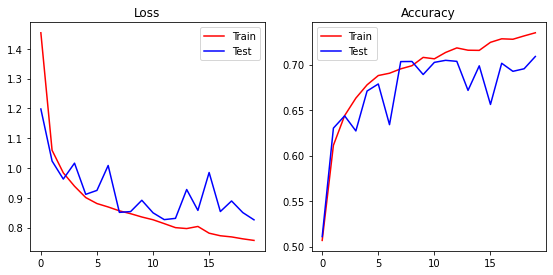

Loss :  0.8260605931282043
Accuracy :  70.89017033576965 %
F1 :  69.6261465549469 %
Precision :  78.53485345840454 %
Recall :  62.73622512817383 %


In [94]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history5.history['loss'], color ='r', label = "Train")
plt.plot(history5.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history5.history['accuracy'], color ='r', label = "Train")
plt.plot(history5.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model5.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

# Loss:

### 1:
مشخص است داده اصلا به خوبی آموزش داده نمیشود و شبکه درست کار نمیکند

### 2:
زیرا این تابع برای داده هایی مناسب که توزیع پیوسته ای داشته باشند و برای مقادیر باینری درست کار نمیکند چون توزیع نرمال ندارند فرض کنید شبکه ما احتمال کلاس 1 را 51 در نظر گرفته و احتمال کلاس 2 را 49 و فرض کنید جواب اصلی کلاس 1 باشد در این صورت پیشبینی شبکه ما 1 میباشد و اگر بخواهیم با این توابع خطا حساب کنیم چون مقدار پیشبینی دقیقا برابر است با مقدار واقعی هیچ خطایی نداریم ولی اینطور نیست و ما باید خطا را بر اساس احتمال هایی که داریم بررسی کنیم نه صرفا خروجی شبکه

In [95]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(128, activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

model6 = models.Model(inputs=input, outputs=output)
model6.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.MeanSquaredError(), metrics=['accuracy', f1_m, precision_m, recall_m])
history6 = model6.fit(TrainData,validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 22s 42ms/step - loss: 0.3222 - accuracy: 0.1933 - f1_m: 0.1932 - precision_m: 0.1932 - recall_m: 0.1932 - val_loss: 0.3257 - val_accuracy: 0.1856 - val_f1_m: 0.1860 - val_precision_m: 0.1860 - val_recall_m: 0.1860
Epoch 2/20
519/519 [==============================] - 21s 41ms/step - loss: 0.3227 - accuracy: 0.1932 - f1_m: 0.1934 - precision_m: 0.1934 - recall_m: 0.1934 - val_loss: 0.3257 - val_accuracy: 0.1856 - val_f1_m: 0.1850 - val_precision_m: 0.1850 - val_recall_m: 0.1850
Epoch 3/20
519/519 [==============================] - 21s 41ms/step - loss: 0.3227 - accuracy: 0.1932 - f1_m: 0.1932 - precision_m: 0.1932 - recall_m: 0.1932 - val_loss: 0.3257 - val_accuracy: 0.1856 - val_f1_m: 0.1855 - val_precision_m: 0.1855 - val_recall_m: 0.1855
Epoch 4/20
519/519 [==============================] - 21s 41ms/step - loss: 0.3227 - accuracy: 0.1932 - f1_m: 0.1931 - precision_m: 0.1931 - recall_m: 0.1931 - val_loss: 0.3257 - val_accuracy: 0.1

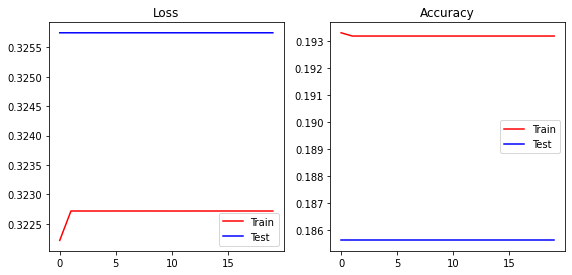

Loss :  0.3257487118244171
Accuracy :  18.562790751457214 %
F1 :  18.54780465364456 %
Precision :  18.54780614376068 %
Recall :  18.54780614376068 %


In [96]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history6.history['loss'], color ='r', label = "Train")
plt.plot(history6.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history6.history['accuracy'], color ='r', label = "Train")
plt.plot(history6.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model6.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

# Regularization
### 1:
همانطور که قبلا هم توضیح داده شد با لگیولایز کردن , باعث جلوگیری شبکه از اور فیت کردن میشویم و همانطور که مشاهده میکنیم تغییرات خطا و دقت از جایی به بعد نسبت به قبل کمتر بالا پایین میشودند و نویز کمتری دارند . این به این دلیل است که شبکه به یه دقت خوبی میرسد دیگر آموزش اضافی نمیبیند تا اور فیت شود

### 2:
اینکه برای تمامی لایه دراپ اوت قرار دهیم ایده خوبی نیست زیرا پارامتر های زیادی را حذف میکنیم . این کار با اینکه ممکن است از پیچیدگی شبکه بکاهد اما بیش از حد آن هم خوب نیست زیرا داده ها را از بین میبرد. در واقع بیش از حد نیاز از پیچیدگی شبکه کاهش داده و همانطور که میبینم خطا بیشتر و دقت کمتر شده و نویز آنها هم نیز زیاد شده

In [97]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
output = layers.Dense(512, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
output = layers.Dense(128, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, kernel_regularizer= regularizers.L2(l2=0.0001), activation="softmax")(output)

model7 = models.Model(inputs=input, outputs=output)
model7.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
history7 = model7.fit(TrainData,validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 22s 40ms/step - loss: 1.5549 - accuracy: 0.5136 - f1_m: 0.4115 - precision_m: 0.6404 - recall_m: 0.3223 - val_loss: 1.1984 - val_accuracy: 0.6159 - val_f1_m: 0.5379 - val_precision_m: 0.7514 - val_recall_m: 0.4228
Epoch 2/20
519/519 [==============================] - 21s 40ms/step - loss: 1.1760 - accuracy: 0.6126 - f1_m: 0.5613 - precision_m: 0.7208 - recall_m: 0.4673 - val_loss: 1.0976 - val_accuracy: 0.6338 - val_f1_m: 0.5929 - val_precision_m: 0.7183 - val_recall_m: 0.5077
Epoch 3/20
519/519 [==============================] - 21s 40ms/step - loss: 1.0735 - accuracy: 0.6453 - f1_m: 0.6076 - precision_m: 0.7426 - recall_m: 0.5197 - val_loss: 1.0918 - val_accuracy: 0.6396 - val_f1_m: 0.5938 - val_precision_m: 0.7392 - val_recall_m: 0.4989
Epoch 4/20
519/519 [==============================] - 21s 40ms/step - loss: 1.0091 - accuracy: 0.6656 - f1_m: 0.6378 - precision_m: 0.7532 - recall_m: 0.5569 - val_loss: 1.0056 - val_accuracy: 0.6

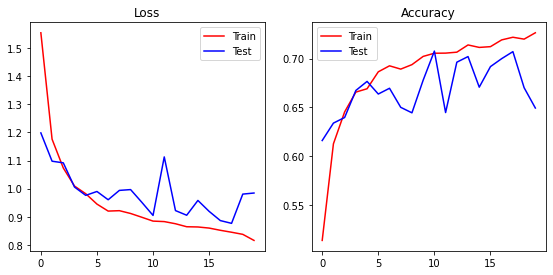

Loss :  0.9843602776527405
Accuracy :  64.92757797241211 %
F1 :  61.83609962463379 %
Precision :  72.91176915168762 %
Recall :  53.93577814102173 %


In [98]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history7.history['loss'], color ='r', label = "Train")
plt.plot(history7.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history7.history['accuracy'], color ='r', label = "Train")
plt.plot(history7.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model7.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

In [99]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(128, kernel_regularizer= regularizers.L2(l2=0.0001), activation="relu")(output)
output = layers.Dropout(0.1)(output)
# output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(5, kernel_regularizer= regularizers.L2(l2=0.0001), activation="softmax")(output)

model8 = models.Model(inputs=input, outputs=output)
model8.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
history8 = model8.fit(TrainData,validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 22s 42ms/step - loss: 1.6626 - accuracy: 0.4476 - f1_m: 0.2968 - precision_m: 0.5658 - recall_m: 0.2151 - val_loss: 1.4631 - val_accuracy: 0.4566 - val_f1_m: 0.2161 - val_precision_m: 0.6850 - val_recall_m: 0.1310
Epoch 2/20
519/519 [==============================] - 21s 41ms/step - loss: 1.2981 - accuracy: 0.5445 - f1_m: 0.4654 - precision_m: 0.7029 - recall_m: 0.3594 - val_loss: 1.2408 - val_accuracy: 0.5923 - val_f1_m: 0.4460 - val_precision_m: 0.7980 - val_recall_m: 0.3147
Epoch 3/20
519/519 [==============================] - 22s 42ms/step - loss: 1.1832 - accuracy: 0.5765 - f1_m: 0.5062 - precision_m: 0.7383 - recall_m: 0.3988 - val_loss: 1.2308 - val_accuracy: 0.5629 - val_f1_m: 0.2627 - val_precision_m: 0.7651 - val_recall_m: 0.1618
Epoch 4/20
519/519 [==============================] - 21s 41ms/step - loss: 1.1271 - accuracy: 0.5991 - f1_m: 0.5299 - precision_m: 0.7480 - recall_m: 0.4194 - val_loss: 1.0575 - val_accuracy: 0.6

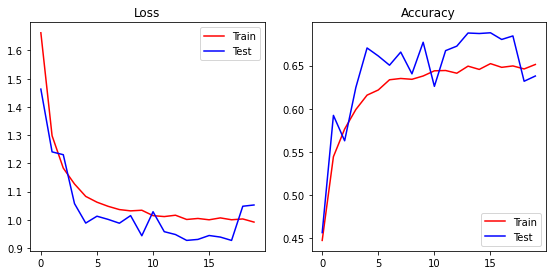

Loss :  1.0527288913726807
Accuracy :  63.78849744796753 %
F1 :  55.64962029457092 %
Precision :  77.90766954421997 %
Recall :  43.64790320396423 %


In [100]:
fig=plt.figure(figsize=(100, 100))
fig.add_subplot(20,20,1)
plt.plot(history8.history['loss'], color ='r', label = "Train")
plt.plot(history8.history['val_loss'], color ='b', label = "Test") 
plt.legend()
plt.title("Loss")
fig.add_subplot(20,20,2)
plt.plot(history8.history['accuracy'], color ='r', label = "Train")
plt.plot(history8.history['val_accuracy'], color ='b', label = "Test") 
plt.legend()
plt.title("Accuracy")
plt.show() 

metrics = model8.evaluate(TestData, verbose=0)
print("Loss : " , metrics[0])
print("Accuracy : " , metrics[1]*100, "%")
print("F1 : " , metrics[2]*100, "%")
print("Precision : " , metrics[3]*100, "%")
print("Recall : " , metrics[4]*100, "%")

In [154]:

l = TestData.filenames
predict = model.predict_generator(TestData)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


WRONG


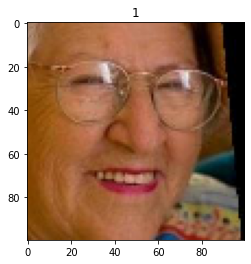

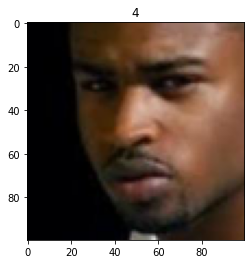

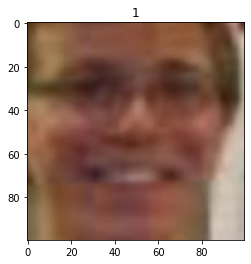

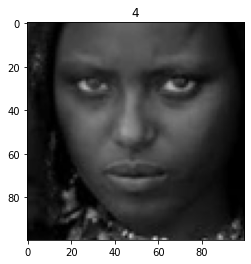

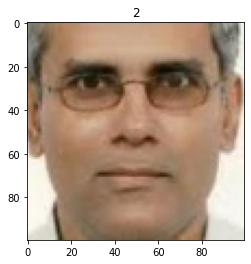

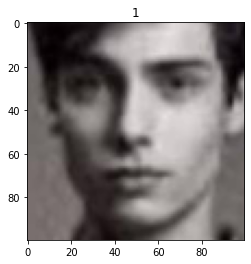

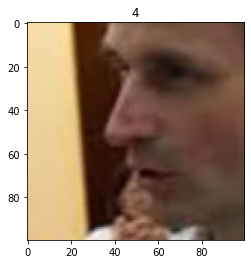

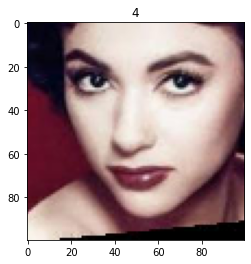

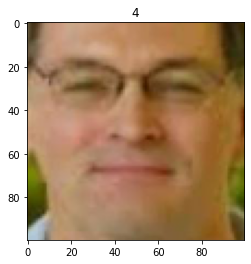

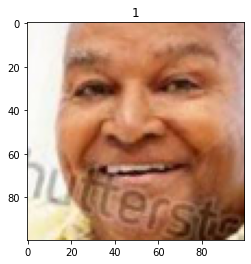

CORRECT


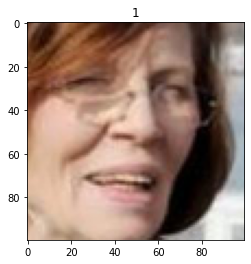

IndexError: ignored

In [160]:
count_correct = 10
count_wrong = 10
correct_img = []
pred_correct = []
wrong_img = []
pred_wrong = []
np.argmax(predict[0])
# TestData.class_indices[]
for i in range(len(predict)):
  this_c = 4 -list(df[ df['image'] == TestData.filenames[i]].to_dict()['Race'].keys())[0]
  predicted = np.argmax(predict[i])
  if predicted == this_c and count_correct > 0:
    count_correct -= 1
    correct_img.append(TestData.filenames[i])
    pred_correct.append(predicted)
  elif predicted != this_c and count_wrong > 0:
    count_wrong -= 1
    wrong_img.append(TestData.filenames[i])
    pred_wrong.append(predicted)
  elif count_correct+count_wrong == 0:
    break

print('WRONG')
img = []
for adr in wrong_img:
  img.append(preprocessing.image.load_img(adr, target_size=(100, 100)))  
for i in range(10):
  plt.imshow(img[i])
  plt.title(pred_wrong[i])
  plt.show()

print('CORRECT')
img = []
for adr in correct_img:
  img.append(preprocessing.image.load_img(adr, target_size=(100, 100)))  
for i in range(10):
  plt.imshow(img[i])
  plt.title(pred_correct[i])
  plt.show()

